In [1]:
import  pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mpp

from sklearn.model_selection import  train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


In [7]:
# # Read the CSV files
# df1 = pd.read_csv('Fake.csv')
# df1['label'] = 'fake'
# df2 = pd.read_csv('True.csv')
# df2['label'] = 'true'

# # Concatenate vertically (stack rows)
# combined_df = pd.concat([df1, df2], ignore_index=True)

# # Save the combined dataframe to a new CSV file
# combined_df.to_csv('fake_or_real_news.csv', index=False)

df = pd.read_csv("fake_or_real_news.csv")
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [5]:
# Check for nulls
print(df.isnull().sum())

# Lowercase all text
df['text'] = df['text'].str.lower()

title      0
text       0
subject    0
date       0
dtype: int64


In [8]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

In [9]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)


In [10]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

Accuracy: 99.43%


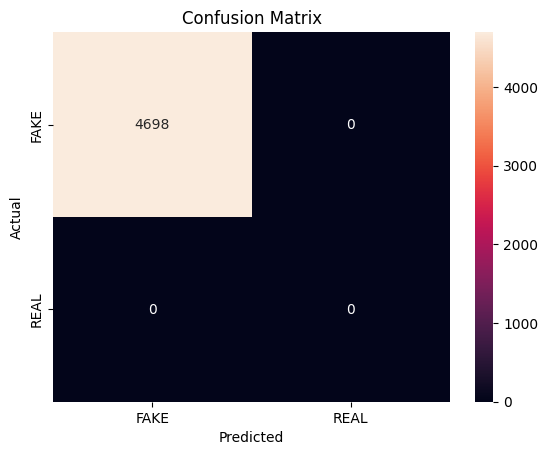

In [17]:
y_pred = pac.predict(tfidf_test)

# Accuracy
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)}%')

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred, labels=['fake', 'real'])
sb.heatmap(confusion, annot=True, fmt='d',
            xticklabels=['FAKE', 'REAL'],
            yticklabels=['FAKE', 'REAL'])
mpp.xlabel('Predicted')
mpp.ylabel('Actual')
mpp.title('Confusion Matrix')
mpp.show()

In [18]:
def predict_news(news_text):
    vect_text = vectorizer.transform([news_text])
    pred = pac.predict(vect_text)
    return f"The news is predicted to be: {pred[0]}"

# Example
predict_news("Government announces new healthcare reform.")

'The news is predicted to be: true'

In [19]:
import joblib

# Save model and vectorizer
joblib.dump(pac, "model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']